# Pandas - Data Analysis with Python


Pandas is a high-performance, easy-to-use data structures and data analysis tools.

<img src="images/pandas.jpg" style="width: 500px;"/>

## What is it good for?

Working with (large) data sets and created automated data processes.

Pandas is extensively used to prepare data in data science (machine learning, data analytics, ...)

**Examples**: 
* **Import and export** data into standard formats (CSV, Excel, Latex, ..).
* Combine with Numpy for **advanced computations** or Matplotlib for **visualisations**.
* Calculate **statistics** and answer questions about the data, like
  * What's the average, median, max, or min of each column?
  * Does column A correlate with column B?
  * What does the distribution of data in column C look like?
* **Clean** up data (e.g. fill out missing information and fix inconsistent formatting) and **merge** multiple data sets into one common dataset.



## Some interesting data sources

### (Norsk) Statistisk sentralbyrå
https://www.ssb.no

Employment rates, immigration rates housing market, ...

<img src="images/ssb.png" style="width: 400px;"/>

### Finn API 
https://www.finn.no/api

Note: Unfortunately currently only open for business



### Oslo Bysykkel API
https://developer.oslobysykkel.no

Live usage data and statistics.

**!! This lecture will use this data.**

### Ruter API 
https://developer.entur.org

Travel planning and live departure information. For example live departure information 


<img src="images/raspberry_pi_project.jpg" style="width: 300px;"/>

(Credits: Malte Pliszewski)

### YR data
http://om.yr.no/verdata/free-weather-data/

### Financial and economic data
https://www.quandl.com/

### And lots lots more:

* Almost every "smart" device, internet of things, ...

## More information

* Official Pandas documentation: http://pandas.pydata.org/pandas-docs/stable/tutorials.html 
* Pandas cookbook: http://pandas.pydata.org/pandas-docs/stable/cookbook.html
* Wes McKinney, Python for Data Analysis 
![Python for Data Analysis](images/python_for_data_analysis.gif "Python for Data Analysis")

## Installation

* If you have Anaconda: Already installed
* If you have Miniconda: 
      conda install pandas
* If you have your another Python distribution: 
      python3 -m pip install pandas

## Quick guide through Pandas


In [1]:
%matplotlib inline

First import pandas (and numpy) as usual.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## The basic data structures of Pandas

<center>
<img src="https://storage.googleapis.com/lds-media/images/series-and-dataframe.width-1200.png
" style="width: 500px;"/>

    Figure: Fundamental data types in Pandas.
    (Image source: https://www.learndatasci.com)
</center>

### Series 

Series in Pands are 1-dimensional, axis-labeled array capable of holding any data type.

The simplest way to create a Series is from a list:

In [4]:
s1 = pd.Series([1, 3, 5, np.nan, 6, 8])
s1

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

* Pandas relies on numpy to store the underlying data. Note the dtype property that we already know from numpy. 
* If no dtype is specified, it chooses a stuitable dtype for your data. 

## Specifying the axis label

By default, the data is labeld by integers. This can be changed with:

In [5]:
s2 = pd.Series([1, 3, 5, np.nan, 6, 8], index=["a", "a", "c", "d", "e", "f"])
s2

a    1.0
a    3.0
c    5.0
d    NaN
e    6.0
f    8.0
dtype: float64

# Time-series data

A common use-case is to have data labeled with time stamps (for instance sensor data).



In [6]:
dates = pd.date_range(start="20181023", end="20191023", periods=6)
dates

DatetimeIndex(['2018-10-23', '2019-01-04', '2019-03-18', '2019-05-30',
               '2019-08-11', '2019-10-23'],
              dtype='datetime64[ns]', freq=None)

In [7]:
s3 = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates)
s3

2018-10-23    1.0
2019-01-04    3.0
2019-03-18    5.0
2019-05-30    NaN
2019-08-11    6.0
2019-10-23    8.0
dtype: float64

# DataFrame

DataFrame's are 2-dimensional labeled data structure with columns of potentially different types.

The most basic method to create a DataFrame is from a dictionary:

In [8]:
data = {"apples": [3, 0, 0, 1], "pears": [6, 1, 3, 5]}

purchases = pd.DataFrame(data)
purchases

,apples,pears
0,3,6
1,0,1
2,0,3
3,1,5


**How did this work:** Each (key, value) pair in the dictionary is interpreted as a column in the data table. The key is used as column label.

As with Series, we can provide an index to label the y-axis:

In [9]:
data = {"apples": [3, 0, 0, 1], "pears": [6, 1, 3, 2]}
customers = ["Marie", "Jørgen", "Hilde", "Hans"]

purchases = pd.DataFrame(data, index=customers)
purchases

,apples,pears
Marie,3,6
Jørgen,0,1
Hilde,0,3
Hans,1,2


## Extracting columns from a DataTable

When **loc**ating (i.e. extracting) a column of a DataFrame, one obtains a `Series`

In [10]:
purchases.loc["Hans"]

apples    1
pears     2
Name: Hans, dtype: int64

In [11]:
type(purchases.loc["Hans"])

pandas.core.series.Series

## Combining two Series to a DataFrame 

In [12]:
s1 = pd.Series([1, 2], index=["A", "B"])
s2 = pd.Series([3, 4], index=["A", "C"])
pd.concat([s1, s2, s1], axis=1, sort=False)

,0,1,2
A,1.0,3.0,1.0
B,2.0,NaN,2.0
C,NaN,4.0,NaN


## Loading data from file

For pratical applications, we will read the data from a file rather from a dictionary. 

Pandas offers various drivers to load data in different formats:

In [13]:
%psearch pd.read_*

We will see this in a real application in a moment.

# Data analysis on the Oslo Byskkel data 



<img src="https://cdn.sanity.io/images/23ukf9xm/production/4acf4a351c2174972b61465210f56878c41bad65-5698x3799.jpg?w=1200&h=600&fit=max" style="width: 500px;"/>



**Goal**: Perfrom data analysis of the bike usage, such as:
* Identify peak and low points of biek station usage (over a year, week or day)?
* Which are the most and least used bike stations?
* Which are the most and least used bike routes?
* Visualize the bike usage in Oslo.

## Step 1: Data aquisition and inspection

The monthly usage data can be downloaded here: https://developer.oslobysykkel.no/data. 


I downloaded the data from August to September 2016:

In [14]:
!ls -hl data/bysykkel/*.csv

-rw-rw-r-- 1 vegard vegard 14M aug.  25 12:34 data/bysykkel/trips-2016.10.1-2016.10.31.csv
-rw-rw-r-- 1 vegard vegard 21M aug.  25 12:34 data/bysykkel/trips-2016.8.1-2016.8.31.csv
-rw-rw-r-- 1 vegard vegard 22M aug.  25 12:34 data/bysykkel/trips-2016.9.1-2016.9.30.csv
-rw-rw-r-- 1 vegard vegard 38M okt.  25 09:12 data/bysykkel/trips-2021.10.1-2021.10.31.csv
-rw-rw-r-- 1 vegard vegard 37M okt.  25 09:12 data/bysykkel/trips-2021.9.1-2021.9.30.csv


Let's inspect the content of one of these files:

In [15]:
!wc data/bysykkel/trips-2016.10.1-2016.10.31.csv

  242759  1213795 14565493 data/bysykkel/trips-2016.10.1-2016.10.31.csv


## Loading the data into a DataFrame

Since this is a comma seperated file, we can use Panda's `read_csv` function:

In [16]:
trips = pd.read_csv("data/bysykkel/trips-2016.10.1-2016.10.31.csv", sep=",")

The result is stored in  a `DataFrame` object. The first row of the csv was used as column labels.

In [17]:
trips

,Start station,Start time,End station,End time
0,283,2016-10-01 06:00:08 +0200,238.0,2016-10-01 06:09:47 +0200
1,169,2016-10-01 06:00:41 +0200,175.0,2016-10-01 06:11:07 +0200
2,211,2016-10-01 06:01:02 +0200,162.0,2016-10-01 06:15:52 +0200
3,200,2016-10-01 06:01:20 +0200,163.0,2016-10-01 06:15:04 +0200
4,157,2016-10-01 06:02:16 +0200,163.0,2016-10-01 06:04:29 +0200
5,177,2016-10-01 06:04:22 +0200,179.0,2016-10-01 06:24:40 +0200
6,257,2016-10-01 06:04:39 +0200,199.0,2016-10-01 06:16:09 +0200
7,191,2016-10-01 06:05:54 +0200,191.0,2016-10-01 06:06:21 +0200
8,191,2016-10-01 06:06:01 +0200,167.0,2016-10-01 06:15:40 +0200
9,181,2016-10-01 06:06:13 +0200,251.0,2016-10-01 06:18:34 +0200


We can use the `head` and `tail` functions to only show the (by default 5) top rows in the data table.

In [18]:
trips.head(5)

,Start station,Start time,End station,End time
0,283,2016-10-01 06:00:08 +0200,238.0,2016-10-01 06:09:47 +0200
1,169,2016-10-01 06:00:41 +0200,175.0,2016-10-01 06:11:07 +0200
2,211,2016-10-01 06:01:02 +0200,162.0,2016-10-01 06:15:52 +0200
3,200,2016-10-01 06:01:20 +0200,163.0,2016-10-01 06:15:04 +0200
4,157,2016-10-01 06:02:16 +0200,163.0,2016-10-01 06:04:29 +0200


## Fixing columns types

Pandas tries to **automatically detect the type** of a column:

In [19]:
trips.dtypes

Start station      int64
Start time        object
End station      float64
End time          object
dtype: object

We can see that this **automatic detection failed** for:

* `Start time`:  should be a date
* `End time`:  should be a date
* `End station`:  should be a integer

## Fixing  start and end times

In order to be able to sort or filter by date, we need to tell Pandas that this column should be parsed as dates. We can do this directly when loading in the data: 

In [20]:
trips = pd.read_csv(
    "data/bysykkel/trips-2016.10.1-2016.10.31.csv",
    sep=",",
    parse_dates=["Start time", "End time"],
    date_parser=lambda col: pd.to_datetime(col, utc=True),
)

**Note!**  The lambda function is necessary to read dates with mixed time-zones!

In [21]:
trips.dtypes

Start station                  int64
Start time       datetime64[ns, UTC]
End station                  float64
End time         datetime64[ns, UTC]
dtype: object

In [22]:
trips.head()

,Start station,Start time,End station,End time
0,283,2016-10-01 04:00:08+00:00,238.0,2016-10-01 04:09:47+00:00
1,169,2016-10-01 04:00:41+00:00,175.0,2016-10-01 04:11:07+00:00
2,211,2016-10-01 04:01:02+00:00,162.0,2016-10-01 04:15:52+00:00
3,200,2016-10-01 04:01:20+00:00,163.0,2016-10-01 04:15:04+00:00
4,157,2016-10-01 04:02:16+00:00,163.0,2016-10-01 04:04:29+00:00


### Fixing end station

We expected `End station` to be of type `np.int64`. We can enforce this with:

In [23]:
trips = pd.read_csv(
    "data/bysykkel/trips-2016.10.1-2016.10.31.csv",
    sep=",",
    parse_dates=["Start time", "End time"],
    date_parser=lambda col: pd.to_datetime(col, utc=True),
    dtype={"End station": np.int64},
)

ValueError: Integer column has NA values in column 2

**Conclusion**: 
`End station` contains `Not a Number` values or`NaN` values, which can be represented in the `float` datatype, but not in the `int` datatype

In [ ]:
trips.sort_values("End station").tail(100)

But we *can* do this if we discard the rows with missing data. Pandas has various utilities for dealing with missing data

In [ ]:
trips = trips_oct = trips.dropna(subset=["End station"]).astype({"End station": int})
trips.tail(5)

# Selecting data from dataframes

## Selecting columns


There are three main ways to select columns from a DataTable:

* indexing notation [].
* The .loc accessor
* The .iloc accessor

## Selecting columns with the index notation

Use the index notation if you know the name of the column(s) that you want to extract.

If you use a single column, the result is a Series:

In [24]:
trips["Start time"].head()

0   2016-10-01 04:00:08+00:00
1   2016-10-01 04:00:41+00:00
2   2016-10-01 04:01:02+00:00
3   2016-10-01 04:01:20+00:00
4   2016-10-01 04:02:16+00:00
Name: Start time, dtype: datetime64[ns, UTC]

## Selecting multiple columns

Multiple columns are selected by indexing with a list of column titles. The result is a DataFrame:

In [25]:
trips[["Start time", "End time"]].head()

,Start time,End time
0,2016-10-01 04:00:08+00:00,2016-10-01 04:09:47+00:00
1,2016-10-01 04:00:41+00:00,2016-10-01 04:11:07+00:00
2,2016-10-01 04:01:02+00:00,2016-10-01 04:15:52+00:00
3,2016-10-01 04:01:20+00:00,2016-10-01 04:15:04+00:00
4,2016-10-01 04:02:16+00:00,2016-10-01 04:04:29+00:00


### Selecting rows and columns 

`loc`  a more explicit alternative for selecting rows and/or columns

**Syntax**: `DataFrame.loc[ROWS, COLUMNS]`

In [26]:
trips.loc[[1, 4, 5], ["Start time", "End time"]]

,Start time,End time
1,2016-10-01 04:00:41+00:00,2016-10-01 04:11:07+00:00
4,2016-10-01 04:02:16+00:00,2016-10-01 04:04:29+00:00
5,2016-10-01 04:04:22+00:00,2016-10-01 04:24:40+00:00


Use the : notation to select ranges of columns/rows.

### Selecting rows and columns based on indices

`iloc` is the same is `loc` but expectes the index positions instead of column names (i.e. always uses intergers)

**Syntax**: `DataFrame.iloc[ROWS, COLUMNS]`

In [27]:
trips.iloc[:5, 0:2]

,Start station,Start time
0,283,2016-10-01 04:00:08+00:00
1,169,2016-10-01 04:00:41+00:00
2,211,2016-10-01 04:01:02+00:00
3,200,2016-10-01 04:01:20+00:00
4,157,2016-10-01 04:02:16+00:00


## Selecting based on values in columns

Comparisons on a series produce a new series of booleans.
This can be used to construct a "mask" of values that can be passed
to loc or index-access:

In [28]:
trips["Start station"] == 283

0          True
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
242728    False
242729    False
242730    False
242731    False
242732    False
242733    False
242734    False
242735    False
242736    False
242737    False
242738    False
242739    False
242740    False
242741    False
242742    False
242743    False
242744    False
242745    False
242746    False
242747    False
242748    False
242749    False
242750    False
242751    False
242752    False
242753    False
242754    False
242755    False
242756    False
242757    False
Name: Start station, Len

In [29]:
(trips["Start station"] == 283).sum()

1321

In [30]:
trips[trips["Start station"] == 283]

,Start station,Start time,End station,End time
0,283,2016-10-01 04:00:08+00:00,238.0,2016-10-01 04:09:47+00:00
359,283,2016-10-01 06:55:45+00:00,219.0,2016-10-01 07:01:49+00:00
486,283,2016-10-01 07:24:19+00:00,284.0,2016-10-01 07:28:29+00:00
572,283,2016-10-01 07:38:59+00:00,170.0,2016-10-01 07:41:09+00:00
650,283,2016-10-01 07:49:42+00:00,189.0,2016-10-01 07:53:22+00:00
1026,283,2016-10-01 08:47:55+00:00,283.0,2016-10-01 10:41:41+00:00
1105,283,2016-10-01 08:56:46+00:00,309.0,2016-10-01 09:03:06+00:00
1161,283,2016-10-01 09:06:23+00:00,170.0,2016-10-01 09:08:13+00:00
1512,283,2016-10-01 09:45:50+00:00,234.0,2016-10-01 10:05:52+00:00
1777,283,2016-10-01 10:09:23+00:00,298.0,2016-10-01 10:14:01+00:00


We can even do complex arithmetic on columns

In [31]:
durations = trips["End time"] - trips["Start time"]
durations

0        00:09:39
1        00:10:26
2        00:14:50
3        00:13:44
4        00:02:13
5        00:20:18
6        00:11:30
7        00:00:27
8        00:09:39
9        00:12:21
10       00:05:18
11       00:03:23
12       00:07:00
13       00:06:22
14       00:06:58
15       00:06:41
16       00:11:16
17       00:10:04
18       00:10:00
19       00:13:35
20       00:09:12
21       00:04:04
22       00:05:57
23       00:03:45
24       00:12:05
25       00:05:49
26       00:07:07
27       00:07:14
28       00:11:14
29       00:09:05
           ...   
242728   00:06:57
242729   00:02:55
242730   00:02:08
242731   00:09:11
242732   00:18:51
242733   00:10:59
242734   00:04:49
242735   00:03:59
242736   00:09:23
242737   00:10:41
242738   00:09:03
242739   00:08:34
242740   00:04:42
242741   00:05:28
242742   00:07:47
242743   00:18:44
242744   01:58:14
242745   00:14:50
242746   00:12:23
242747   00:06:13
242748   00:04:38
242749   00:15:37
242750   00:04:45
242751   00:15:24
242752   0

In [32]:
durations.quantile(0.9)

Timedelta('0 days 00:23:21')

Anything that results in a boolean Series with the same index as a dataframe or series
can be used to select a subset of data.

This example says: give us the top 10% (above 90th percential) of trips by duration

In [33]:
trips[durations >= durations.quantile(0.9)]

,Start station,Start time,End station,End time
33,285,2016-10-01 04:33:13+00:00,222.0,2016-10-01 05:57:49+00:00
41,277,2016-10-01 04:37:56+00:00,277.0,2016-10-01 05:30:49+00:00
52,183,2016-10-01 04:44:03+00:00,272.0,2016-10-01 05:08:39+00:00
64,208,2016-10-01 04:52:09+00:00,281.0,2016-10-01 14:08:30+00:00
109,251,2016-10-01 05:16:10+00:00,185.0,2016-10-01 09:54:50+00:00
114,251,2016-10-01 05:18:18+00:00,211.0,2016-10-01 15:04:05+00:00
124,176,2016-10-01 05:21:33+00:00,267.0,2016-10-01 12:07:15+00:00
133,219,2016-10-01 05:26:53+00:00,182.0,2016-10-01 06:16:42+00:00
177,264,2016-10-01 05:42:34+00:00,264.0,2016-10-01 08:05:02+00:00
178,243,2016-10-01 05:43:24+00:00,175.0,2016-10-18 07:53:19+00:00


Or specify a value. Pandas has lots of *very* useful convenience functions
for comparing dates. You can often specify a string which pandas will interpret

In [34]:
trips[durations >= "1 day"]

,Start station,Start time,End station,End time
178,243,2016-10-01 05:43:24+00:00,175.0,2016-10-18 07:53:19+00:00
963,226,2016-10-01 08:39:35+00:00,172.0,2016-10-06 17:09:17+00:00
1370,226,2016-10-01 09:35:22+00:00,173.0,2016-10-17 05:48:48+00:00
3629,199,2016-10-01 12:43:13+00:00,240.0,2016-10-03 21:08:30+00:00
4677,301,2016-10-01 13:59:43+00:00,176.0,2016-10-04 05:36:49+00:00
5004,280,2016-10-01 14:23:55+00:00,264.0,2016-10-03 07:39:39+00:00
6093,199,2016-10-01 15:47:02+00:00,191.0,2016-10-04 13:46:38+00:00
6110,181,2016-10-01 15:48:01+00:00,228.0,2016-10-06 12:29:53+00:00
6741,226,2016-10-01 16:40:40+00:00,NaN,2016-10-04 05:53:55+00:00
7048,233,2016-10-01 17:05:33+00:00,157.0,2016-10-10 16:18:13+00:00


## Special handling of strings and datetime

Series with datetime data or strings have special accessor methods for working with that kind of data
by accessing a `.dt` or `.str` attribute, giving access to 

In [35]:
trips["Start time"].dt.weekday

0         5
1         5
2         5
3         5
4         5
5         5
6         5
7         5
8         5
9         5
10        5
11        5
12        5
13        5
14        5
15        5
16        5
17        5
18        5
19        5
20        5
21        5
22        5
23        5
24        5
25        5
26        5
27        5
28        5
29        5
         ..
242728    0
242729    0
242730    0
242731    0
242732    0
242733    0
242734    0
242735    0
242736    0
242737    0
242738    0
242739    0
242740    0
242741    0
242742    0
242743    0
242744    0
242745    0
242746    0
242747    0
242748    0
242749    0
242750    0
242751    0
242752    0
242753    0
242754    0
242755    0
242756    0
242757    0
Name: Start time, Length: 242758, dtype: int64

Boolean series can be combined using Python's bitwise or (`|`) and bitwise and (`&`) operators.
So we can find late-night trips, i.e. those that start between 22:00 and 04:00

In [36]:
trips[(trips["Start time"].dt.hour >= 22) | (trips["Start time"].dt.hour <= 3)]

,Start station,Start time,End station,End time
26424,287,2016-10-04 03:59:55+00:00,195.0,2016-10-04 04:03:18+00:00
26425,229,2016-10-04 03:59:56+00:00,247.0,2016-10-04 04:05:28+00:00
79522,206,2016-10-10 03:59:56+00:00,196.0,2016-10-10 04:04:46+00:00
108408,283,2016-10-13 03:59:52+00:00,280.0,2016-10-13 04:05:36+00:00
108409,251,2016-10-13 03:59:54+00:00,265.0,2016-10-13 04:05:13+00:00
108410,174,2016-10-13 03:59:59+00:00,295.0,2016-10-13 04:11:43+00:00
117633,206,2016-10-14 03:59:58+00:00,301.0,2016-10-14 04:04:04+00:00
152735,222,2016-10-19 03:59:59+00:00,186.0,2016-10-19 04:05:40+00:00
193405,226,2016-10-25 03:59:47+00:00,211.0,2016-10-25 04:04:20+00:00
193406,251,2016-10-25 03:59:48+00:00,267.0,2016-10-25 04:08:01+00:00


## GroupBy

grouping is like creating a dictionary of dataframes for subsets of your data.
You can group by any kind of value.
The result is like a dictionary of data frames,
where each one contains a subset of data matching some criterion.

You can pass groupby one or more column names to group by unique values on that column

In [37]:
trips.groupby("Start station")

groupby can be expensive, so it delays actual operations as late as possible

In [38]:
trips.groupby("Start station")["End station"]

Metrics such as `count`, `unique`, `value_counts` etc. result in actual evaluation

In [39]:
trips.groupby("Start station")["End station"].count()

Start station
157    2108
158    1465
159    1597
160    1121
161    2444
162    2571
163    2258
164    3428
167    1012
169    2419
170    1450
172     819
173    1581
174     517
175    2719
176    1391
177    1519
178     663
179    1640
181    4440
182    2046
183    1707
184    1762
185    1859
186    1588
188     256
189    2557
190    2888
191    4325
192    1382
       ... 
273    1043
274    2709
275    1268
277    4345
278     568
279    1061
280    1337
281     950
283    1321
284    1544
285    1479
287    3289
288    1483
290    1721
291    1880
292    2908
293     964
294    4513
295    1197
297    1422
298     919
299    1075
301    1773
302     866
304     474
305     621
306    1414
307     256
308     257
309     464
Name: End station, Length: 131, dtype: int64

`.value_counts()` creates a Series, so we have a two-level index:

In [40]:
trips.groupby("Start station")["End station"].value_counts()

Start station  End station
157            211.0          165
               157.0          125
               163.0          112
               186.0           96
               277.0           94
               191.0           80
               294.0           71
               181.0           55
               288.0           51
               175.0           50
               253.0           49
               200.0           44
               235.0           44
               281.0           44
               201.0           39
               297.0           39
               274.0           37
               287.0           37
               229.0           34
               233.0           34
               164.0           33
               236.0           33
               228.0           32
               266.0           32
               204.0           30
               262.0           28
               234.0           27
               173.0           25
               177.0 

In [41]:
trips.groupby("Start station")["End station"].value_counts()[157]

End station
211.0    165
157.0    125
163.0    112
186.0     96
277.0     94
191.0     80
294.0     71
181.0     55
288.0     51
175.0     50
253.0     49
200.0     44
235.0     44
281.0     44
201.0     39
297.0     39
274.0     37
287.0     37
229.0     34
233.0     34
164.0     33
236.0     33
228.0     32
266.0     32
204.0     30
262.0     28
234.0     27
173.0     25
177.0     25
210.0     25
        ... 
285.0      4
292.0      4
161.0      3
162.0      3
172.0      3
176.0      3
212.0      3
213.0      3
255.0      3
271.0      3
158.0      2
182.0      2
189.0      2
197.0      2
227.0      2
232.0      2
254.0      2
260.0      2
280.0      2
298.0      2
170.0      1
203.0      1
217.0      1
218.0      1
219.0      1
249.0      1
265.0      1
268.0      1
275.0      1
307.0      1
Name: End station, Length: 101, dtype: int64

We can use groupby to count the number of tripts that start on each weekday:

In [42]:
trips.groupby(trips["Start time"].dt.weekday).count()

,Start station,Start time,End station,End time
Start time,,,,
0,40526,40526,40525,40526
1,36907,36907,36905,36907
2,36468,36468,36465,36468
3,36990,36990,36989,36990
4,35199,35199,35199,35199
5,32125,32125,32122,32125
6,24543,24543,24542,24543


In [43]:
trips.groupby(trips["Start time"].dt.weekday)["Start station"].count()

Start time
0    40526
1    36907
2    36468
3    36990
4    35199
5    32125
6    24543
Name: Start station, dtype: int64

In [44]:
by_day = trips.groupby(trips["Start time"].dt.weekday)
grouped = trips.groupby(
    [
        trips["Start time"].dt.weekday,
        trips["Start time"].dt.day == trips["End time"].dt.day,
    ]
)
print(
    (grouped.count() / by_day.count())["Start station"].to_string(
        float_format="{:,.2%}".format
    )
)

Start time       
0           False    0.32%
            True    99.68%
1           False    0.34%
            True    99.66%
2           False    0.29%
            True    99.71%
3           False    0.34%
            True    99.66%
4           False    0.32%
            True    99.68%
5           False    0.48%
            True    99.52%
6           False    0.54%
            True    99.46%


In [45]:
by_day = trips.groupby(trips["Start time"].dt.weekday)
by_day.count()

,Start station,Start time,End station,End time
Start time,,,,
0,40526,40526,40525,40526
1,36907,36907,36905,36907
2,36468,36468,36465,36468
3,36990,36990,36989,36990
4,35199,35199,35199,35199
5,32125,32125,32122,32125
6,24543,24543,24542,24543


In [46]:
grouped = trips.groupby(
    [
        trips["Start time"].dt.weekday,
        trips["Start time"].dt.day == trips["End time"].dt.day,
    ]
)
grouped.count()

Start station  Start time  End station  End time
Start time                                                        
0          False            129         129          128       129
           True           40397       40397        40397     40397
1          False            126         126          125       126
           True           36781       36781        36780     36781
2          False            106         106          103       106
           True           36362       36362        36362     36362
3          False            125         125          124       125
           True           36865       36865        36865     36865
4          False            111         111          111       111
           True           35088       35088        35088     35088
5          False            154         154          151       154
           True           31971       31971        31971     31971
6          False            132         132          131       132
           True           24411       24411        24411     24411

In [47]:
s = (grouped.count() / by_day.count())["Start station"]
s

Start time       
0           False    0.003183
            True     0.996817
1           False    0.003414
            True     0.996586
2           False    0.002907
            True     0.997093
3           False    0.003379
            True     0.996621
4           False    0.003153
            True     0.996847
5           False    0.004794
            True     0.995206
6           False    0.005378
            True     0.994622
Name: Start station, dtype: float64

In [48]:
print(s.to_string(float_format="{:,.2%}".format))

Start time       
0           False    0.32%
            True    99.68%
1           False    0.34%
            True    99.66%
2           False    0.29%
            True    99.71%
3           False    0.34%
            True    99.66%
4           False    0.32%
            True    99.68%
5           False    0.48%
            True    99.52%
6           False    0.54%
            True    99.46%


## Visualisation

We can use the `plot` class method to plot our data table:

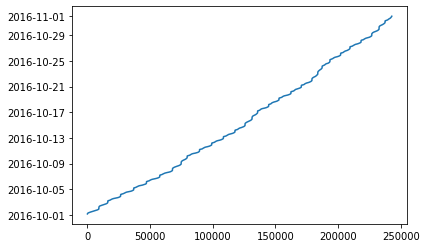

In [49]:
trips["Start time"].plot();

By default, the DataFrame index is used to label the x-axis.

## Plotting multiple columns 

Passing multiple columns results in multiple plot lines

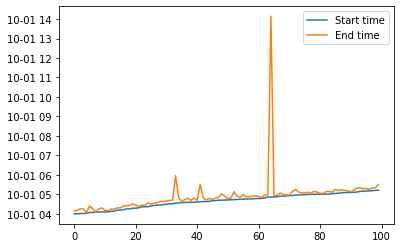

In [50]:
trips[["Start time", "End time"]].head(100).plot();

In order to get a more meaningful x-axis, we can select a column to be used as the x-axis:

/home/vegard/.local/lib/python3.6/site-packages/pandas/plotting/_tools.py:308: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/vegard/.local/lib/python3.6/site-packages/pandas/plotting/_tools.py:308: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/vegard/.local/lib/python3.6/site-packages/pandas/plotting/_tools.py:314: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/home/vegard/.local/lib/python3.6/site-packages/pandas/plotting/_tools.py:314: Matp

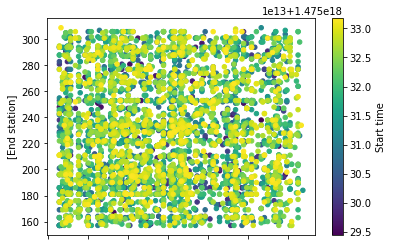

In [51]:
trips.head(5000).plot.scatter(
    x="Start station", y=["End station"], c="Start time", cmap="viridis"
);

## Bar plots

The documentation of plot reveils many more plotting options:

In [52]:
trips.plot?

For example, let's create a bar plot:

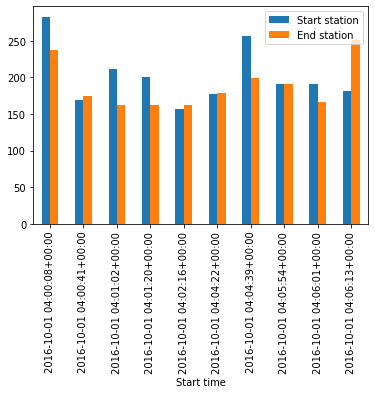

In [53]:
trips.head(10).plot(x="Start time", y=["Start station", "End station"], kind="bar");

## Histograms

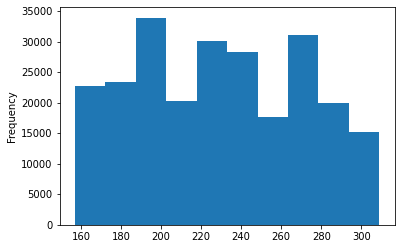

In [54]:
trips["Start station"].plot(kind="hist");

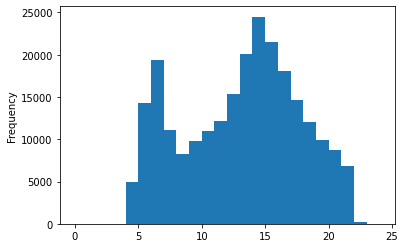

In [55]:
trips["Start time"].dt.hour.plot(kind="hist", bins=range(25));

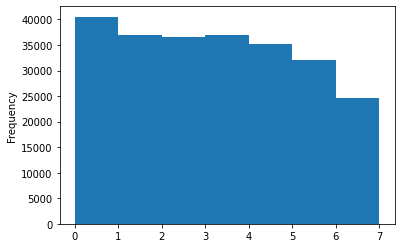

In [56]:
trips["Start time"].dt.weekday.plot.hist(bins=range(8));

'unstack' takes a two-level index and promotes one level to column names

In [57]:
grouped.count()["Start station"].unstack(1)

,False,True
Start time,,
0,129,40397
1,126,36781
2,106,36362
3,125,36865
4,111,35088
5,154,31971
6,132,24411


In [58]:
import calendar

import matplotlib.pyplot as plt

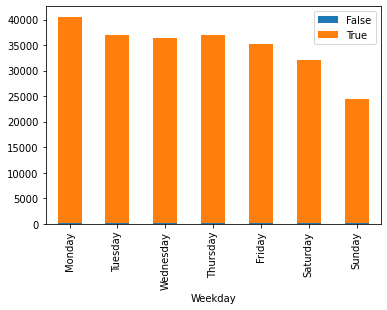

In [59]:
grouped.count()["Start station"].unstack(1).plot(kind="bar", stacked=True)
plt.xlabel("Weekday")
plt.xticks(range(7), calendar.day_name);

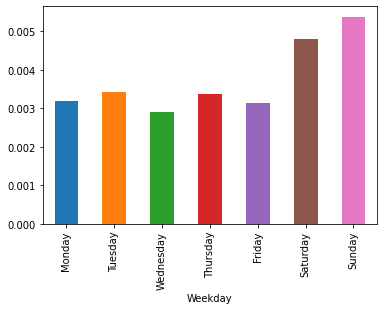

In [60]:
(grouped.count() / by_day.count())["Start station"].unstack(1)[False].plot.bar()
plt.xlabel("Weekday")
plt.xticks(range(7), calendar.day_name);

## Saving data 

DataFrames can be saved to various formats. 

For exporting to a spreadsheet compatible format (e.g. Excel), you can export as CSV file: 

In [61]:
data = trips[["Start station", "End station"]].head(10)

with open("start_stop_stations.csv", "w") as file:
    csv = data.to_csv()
    print(csv)
    file.write(csv)

,Start station,End station
0,283,238.0
1,169,175.0
2,211,162.0
3,200,163.0
4,157,163.0
5,177,179.0
6,257,199.0
7,191,191.0
8,191,167.0
9,181,251.0



## Usefull trick for your bachelor/master thesis

**Goal**: If you do data analyis as part of your research, it is usefull to generate any figures/tables directly from your analytics scripts. 

**Solution**: Pandas can automatically generate Latex tables: 

In [62]:
with open("table.tex", "w") as file:
    latex = data.to_latex()
    print(latex)
    file.write(latex)

\begin{tabular}{lrr}
\toprule
{} &  Start station &  End station \\
\midrule
0 &            283 &        238.0 \\
1 &            169 &        175.0 \\
2 &            211 &        162.0 \\
3 &            200 &        163.0 \\
4 &            157 &        163.0 \\
5 &            177 &        179.0 \\
6 &            257 &        199.0 \\
7 &            191 &        191.0 \\
8 &            191 &        167.0 \\
9 &            181 &        251.0 \\
\bottomrule
\end{tabular}



## Simple data analytics: What are the most used bike stations?

**Approach**: For each bike station usage, the station's `id` occurs in a new row in the `Start station` column. 
In order to find how often a bike station is used, we count how often the station id occurs in the `Start station` column. By sorting these counds from high to low, we get the most used bike stations. 

The function `value_counts` does exactly what we need:

In [63]:
trips["Start station"].value_counts()[10:]

229    3771
210    3586
262    3568
164    3428
287    3289
228    3098
232    3075
292    2908
190    2888
226    2790
200    2733
175    2719
272    2712
274    2709
235    2697
227    2672
162    2572
189    2557
219    2548
206    2489
211    2482
247    2454
161    2444
169    2419
266    2394
268    2359
163    2258
204    2254
218    2237
264    2159
       ... 
167    1012
231     979
254     974
293     964
281     950
298     919
259     903
215     895
302     866
260     860
172     819
240     728
212     714
178     663
305     621
278     568
252     517
174     517
304     474
309     464
241     371
205     332
239     315
209     303
230     286
249     270
308     257
307     256
188     256
256     153
Name: Start station, Length: 121, dtype: int64

Let's plot the result in the bar chart:

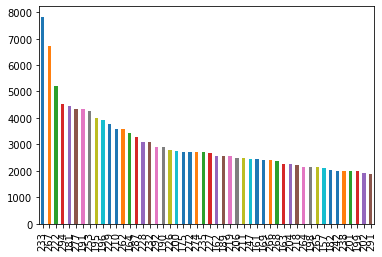

In [64]:
trips["Start station"].value_counts()[:50].plot(kind="bar")
plt.grid(False);

## Concatenating DataFrames 1/2

The data so far only contained the statistics for October 2016:

In [65]:
trips_oct["Start time"].min(), trips_oct["Start time"].max()

NameError: name 'trips_oct' is not defined

Let us load the data for September 2016:

In [66]:
trips_sep = pd.read_csv(
    "data/bysykkel/trips-2016.9.1-2016.9.30.csv",
    sep=",",
    parse_dates=["Start time", "End time"],
    date_parser=lambda col: pd.to_datetime(col, utc=True),
)
# perform transform to ensure we have integer stations
trips_sep = trips_sep.dropna().astype({"End station": int})

## Concatenating DataFrames 2/2

To concatenate the two, we use the `concat` function:

In [67]:
trips = pd.concat([trips_sep, trips_oct]).reset_index()

NameError: name 'trips_oct' is not defined

Let's check that we indeed have the full range:

In [ ]:
trips["Start time"].min(), trips["Start time"].max()

In [ ]:
len(trips_sep), len(trips_oct), len(trips)

# Linking multiple tables

**Problem**: At the moment, the bike stations are anonymous ids. It would be usefull to have additional meta-data (location name, GPS coordinates, ...) attached. 

Luckily we have a file that contains this information:

In [68]:
import json

with open("data/bysykkel/stations.json") as f:
    station_info = json.load(f)
station_info["stations"][:2]

[{'bounds': [{'latitude': 59.915418602160436, 'longitude': 10.762068629264832},
   {'latitude': 59.91565254992276, 'longitude': 10.762672126293182},
   {'latitude': 59.915807169665264, 'longitude': 10.762433409690855},
   {'latitude': 59.91557994562126, 'longitude': 10.761821866035461},
   {'latitude': 59.915418602160436, 'longitude': 10.762068629264832}],
  'center': {'latitude': 59.91562, 'longitude': 10.762248},
  'id': 157,
  'in_service': True,
  'number_of_locks': 30,
  'subtitle': 'mellom Norbygata og Urtegata',
  'title': 'Nylandsveien'},
 {'bounds': [{'latitude': 59.93914016847159, 'longitude': 10.758990666291977},
   {'latitude': 59.93914016847159, 'longitude': 10.759349333708023},
   {'latitude': 59.939319831528415, 'longitude': 10.759349333708023},
   {'latitude': 59.939319831528415, 'longitude': 10.758990666291977},
   {'latitude': 59.93914016847159, 'longitude': 10.758990666291977}],
  'center': {'latitude': 59.939228, 'longitude': 10.75917},
  'id': 158,
  'in_service': 

## Reading the station information 1/3

The obvious thing would be to use `pd.read_json`:

In [69]:
bike_stations = pd.read_json("data/bysykkel/stations")

ValueError: Expected object or value

Does not work because `read_json` expects the json to have a specific structure.

## Reading the station information 2/3

Instead we load the data with the `json` module:

In [70]:
import json

with open("data/bysykkel/stations.json") as f:
    stations_json = json.load(f)
print(stations_json.keys())

dict_keys(['stations'])


We are interested in the node `stations`, so let's extract this:

In [71]:
station_json = stations_json["stations"]
print(len(station_json))
station_json[:2]

130


[{'bounds': [{'latitude': 59.915418602160436, 'longitude': 10.762068629264832},
   {'latitude': 59.91565254992276, 'longitude': 10.762672126293182},
   {'latitude': 59.915807169665264, 'longitude': 10.762433409690855},
   {'latitude': 59.91557994562126, 'longitude': 10.761821866035461},
   {'latitude': 59.915418602160436, 'longitude': 10.762068629264832}],
  'center': {'latitude': 59.91562, 'longitude': 10.762248},
  'id': 157,
  'in_service': True,
  'number_of_locks': 30,
  'subtitle': 'mellom Norbygata og Urtegata',
  'title': 'Nylandsveien'},
 {'bounds': [{'latitude': 59.93914016847159, 'longitude': 10.758990666291977},
   {'latitude': 59.93914016847159, 'longitude': 10.759349333708023},
   {'latitude': 59.939319831528415, 'longitude': 10.759349333708023},
   {'latitude': 59.939319831528415, 'longitude': 10.758990666291977},
   {'latitude': 59.93914016847159, 'longitude': 10.758990666291977}],
  'center': {'latitude': 59.939228, 'longitude': 10.75917},
  'id': 158,
  'in_service': 

### Reading in station infromation 3/3

We can now use the `pandas.json_normalize` function to read in the entire dataset:

In [72]:
stations = pd.json_normalize(station_json)
stations

AttributeError: module 'pandas' has no attribute 'json_normalize'

## Setting the index

Before extracting data from the `DataFrame`, it is good practice to assign a column with unique values as the index of the dataframe (if possible). For the stations DataFrame, the `id` column is a natural choice:

In [73]:
stations = stations.set_index("id")
stations

NameError: name 'stations' is not defined

The index will be used, e.g. for row labels when plotting:

In [74]:
stations.head(10)["number_of_locks"].plot(kind="bar");

NameError: name 'stations' is not defined

### Removing columns from DataFrames

Some of the columns are not usefull. We can remove columns from a DataFrame with:
```python
Dataframe.drop([Column Name or list], axis=1)
```
Lets reduce our stations to the usefull columns:

In [75]:
stations = stations.drop(["bounds", "subtitle"], axis=1)  # axis=0 drops rows
stations.head()

NameError: name 'stations' is not defined

**Alternative**: Use `.loc` to select a subset of a DataFrame
```python
DataFrame.loc[startrow:endrow,startcolumn:endcolumn]
```

## Adding computed columns

Sometimes it is usefull to add a new column based on calculations. 

**Syntax**:
```python
Dataframe.apply(function, axis=1)  # Results in a Series
``` 

**Example**: Add a column with the distance from the station to Oslo center. 

First we compute a Series with the distance values:

In [76]:
from numpy import arcsin, cos, pi, sqrt

oslo_center = 59.9127, 10.7461  # oslo center latitude, longitude


def distance_to_oslo_center(row):
    """Computes the distance of a lat/lon"""

    lat_station = row["center.latitude"]
    lon_station = row["center.longitude"]

    lat_sentrum, lon_sentrum = oslo_center

    degrees = pi / 180  # convert degrees to radians
    a = (
        0.5
        - (cos((lat_sentrum - lat_station) * degrees) / 2)
        + (
            cos(lat_sentrum * degrees)
            * cos(lat_station * degrees)
            * (1 - cos((lon_station - lon_sentrum) * degrees))
            / 2
        )
    )
    return 12742 * arcsin(sqrt(a))  # 2 * R * asin...


distance = stations.apply(distance_to_oslo_center, axis=1)
distance

NameError: name 'stations' is not defined

Then we add that serie to the DataFrame:

In [44]:
stations["distance_to_oslo_center"] = distance
stations

,in_service,title,number_of_locks,center.latitude,center.longitude,distance_to_oslo_center
id,,,,,,
157,True,Nylandsveien,30,59.915620,10.762248,0.956887
158,True,Bentsebrugata,24,59.939228,10.759170,3.038354
159,True,Hans Nielsen Hauges plass,21,59.939238,10.774279,3.342640
160,True,Sjøsiden vest,25,59.910215,10.751687,0.416360
161,True,St. Hanshaugen park vest,20,59.926872,10.738456,1.632424
...,...,...,...,...,...,...
305,True,Georg Morgenstiernes hus,45,59.938998,10.723075,3.193283
306,True,Møllergata,30,59.915290,10.748453,0.316456
307,True,Bak Niels Treschows hus sør,42,59.942525,10.723352,3.550350


### Min, max mean of Series data:

We can use mathematical functions such as `min`, `max` or `mean` to get statistical information about a column:

Minimum number of locks:

In [45]:
stations["number_of_locks"].min()

6

Maximum number of locks:

In [46]:
stations["number_of_locks"].max()

48

Average number of locks:

In [47]:
stations["number_of_locks"].mean()

22.29230769230769

## Plotting maps

It would be nice to plot the stations on a map.

In [1]:
from ipyleaflet import Map, Marker, basemap_to_tiles, basemaps
from ipywidgets import HTML

oslo_map = Map(
    center=oslo_center,
    zoom=13,
)


def add_marker(row):
    center = row["center.latitude"], row["center.longitude"]
    m = Marker(
        location=center,
        title=f"{row.name} {row['title']}",
    )

    oslo_map.add_layer(m)
    m.popup = HTML(f"{m.title}<br/>{row.distance_to_oslo_center:.2f} km to center")


stations.apply(add_marker, axis=1)
oslo_map

NameError: name 'oslo_center' is not defined

# Merging Panda objects

So far our bike statistics stores the bike stations as integers:


In [ ]:
trips.head()

Wouldn't it be nice to add the station information? 

We achieve this by merging the information in the `stations` DataFrame into the `trips_sep_oct` DataFrame. The syntax for merging two tables with the most important arguments is:

```python
pd.merge(left, right, how='inner', left_on=None, right_on=None)
```         
The arguments mean the following:
* `left`: A DataFrame object
* `right`: Another DataFrame object
* `left_on`: Columns from the left DataFrame to use as keys. Can either be column names or arrays with length equal to the length of the DataFrame
* `right_on`: Columns from the right DataFrame to use as keys. Can either be column names or arrays with length equal to the length of the DataFrame
* `how`: One of 'left', 'right', 'outer', 'inner'. Defaults to inner. See below for more detailed description of each method:


###  A simple demo on merging

In [29]:
purchases = pd.DataFrame({"product": ["apples", "oranges"], "purchases": [1, 3]})
purchases

,product,purchases
0,apples,1
1,oranges,3


In [30]:
prices = pd.DataFrame({"product": ["apples", "pears"], "price": [5.5, 1.2]})
prices

,product,price
0,apples,5.5
1,pears,1.2


In [31]:
pd.merge(purchases, prices, how="right", left_on="product", right_on="product")

,product,purchases,price
0,apples,1.0,5.5
1,pears,NaN,1.2


### Back to the Oslo Bysykkel example

Let's try it out. First, lets check the names of our columns again:

In [32]:
print(trips.dtypes)

index                          int64
Start station                  int64
Start time       datetime64[ns, UTC]
End station                    int64
End time         datetime64[ns, UTC]
dtype: object


In [33]:
print(stations.dtypes)

in_service                    bool
title                       object
number_of_locks              int64
center.latitude            float64
center.longitude           float64
distance_to_oslo_center    float64
dtype: object


We want to merge in the columns `trips["Start station"]` with the index for `stations`. We merge call is therefore:

In [34]:
merged_bike_stats = pd.merge(
    trips, stations, how="left", left_on="Start station", right_index=True
)
merged_bike_stats

,index,Start station,Start time,End station,End time,in_service,title,number_of_locks,center.latitude,center.longitude,distance_to_oslo_center
0,0,291,2016-09-01 04:00:02+00:00,301,2016-09-01 04:06:06+00:00,True,St. Hanshaugen park nord,15.0,59.929858,10.743541,1.913205
1,1,262,2016-09-01 04:00:07+00:00,292,2016-09-01 04:15:43+00:00,True,Sofienbergparken nord,33.0,59.923159,10.766055,1.609201
2,2,277,2016-09-01 04:00:07+00:00,163,2016-09-01 04:03:07+00:00,True,Helga Helgesens plass,25.0,59.912071,10.766201,1.122704
3,3,174,2016-09-01 04:00:07+00:00,157,2016-09-01 04:11:33+00:00,True,Frogner Tennisklubb,15.0,59.926205,10.709786,2.520150
4,4,257,2016-09-01 04:00:13+00:00,257,2016-09-01 05:36:16+00:00,True,Trondheimsveien,10.0,59.923033,10.771682,1.831154
...,...,...,...,...,...,...,...,...,...,...,...
620391,242753,284,2016-10-31 22:53:30+00:00,164,2016-10-31 23:04:13+00:00,True,Majorstuen skole,27.0,59.929829,10.713032,2.650263
620392,242754,218,2016-10-31 22:53:48+00:00,292,2016-10-31 23:09:17+00:00,True,Briskeby,15.0,59.920187,10.717955,1.775960
620393,242755,204,2016-10-31 22:54:28+00:00,277,2016-10-31 23:01:59+00:00,True,Paléhaven,48.0,59.910287,10.750012,0.345761
620394,242756,204,2016-10-31 22:56:57+00:00,201,2016-10-31 23:02:16+00:00,True,Paléhaven,48.0,59.910287,10.750012,0.345761


Let's check that we still have all the data rows:

In [35]:
print(len(merged_bike_stats))
print(len(trips))

620396
620396


Wohooo!

Let us do the same for `End station`. To avoid overlapping column names, we use the `suffixes`:

In [36]:
merged_bike_stats2 = pd.merge(
    merged_bike_stats,
    stations,
    how="left",
    left_on="End station",
    right_index=True,
    suffixes=("_start", "_end"),
)
merged_bike_stats2

,index,Start station,Start time,End station,End time,in_service_start,title_start,number_of_locks_start,center.latitude_start,center.longitude_start,distance_to_oslo_center_start,in_service_end,title_end,number_of_locks_end,center.latitude_end,center.longitude_end,distance_to_oslo_center_end
0,0,291,2016-09-01 04:00:02+00:00,301,2016-09-01 04:06:06+00:00,True,St. Hanshaugen park nord,15.0,59.929858,10.743541,1.913205,True,Professor Aschehougs plass,19.0,59.914742,10.741007,0.363529
1,1,262,2016-09-01 04:00:07+00:00,292,2016-09-01 04:15:43+00:00,True,Sofienbergparken nord,33.0,59.923159,10.766055,1.609201,True,Tjuvholmen,30.0,59.909494,10.722502,1.362960
2,2,277,2016-09-01 04:00:07+00:00,163,2016-09-01 04:03:07+00:00,True,Helga Helgesens plass,25.0,59.912071,10.766201,1.122704,True,Vaterlandsparken,42.0,59.913409,10.757370,0.633157
3,3,174,2016-09-01 04:00:07+00:00,157,2016-09-01 04:11:33+00:00,True,Frogner Tennisklubb,15.0,59.926205,10.709786,2.520150,True,Nylandsveien,30.0,59.915620,10.762248,0.956887
4,4,257,2016-09-01 04:00:13+00:00,257,2016-09-01 05:36:16+00:00,True,Trondheimsveien,10.0,59.923033,10.771682,1.831154,True,Trondheimsveien,10.0,59.923033,10.771682,1.831154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620391,242753,284,2016-10-31 22:53:30+00:00,164,2016-10-31 23:04:13+00:00,True,Majorstuen skole,27.0,59.929829,10.713032,2.650263,True,Vår Frelsers gravlund sør,18.0,59.919530,10.743836,0.769874
620392,242754,218,2016-10-31 22:53:48+00:00,292,2016-10-31 23:09:17+00:00,True,Briskeby,15.0,59.920187,10.717955,1.775960,True,Tjuvholmen,30.0,59.909494,10.722502,1.362960
620393,242755,204,2016-10-31 22:54:28+00:00,277,2016-10-31 23:01:59+00:00,True,Paléhaven,48.0,59.910287,10.750012,0.345761,True,Helga Helgesens plass,25.0,59.912071,10.766201,1.122704
620394,242756,204,2016-10-31 22:56:57+00:00,201,2016-10-31 23:02:16+00:00,True,Paléhaven,48.0,59.910287,10.750012,0.345761,True,Munkegata trikkestopp,24.0,59.908184,10.767799,1.309760


## What are the busiest stations?

Let's first find the busiest station:

<AxesSubplot:>

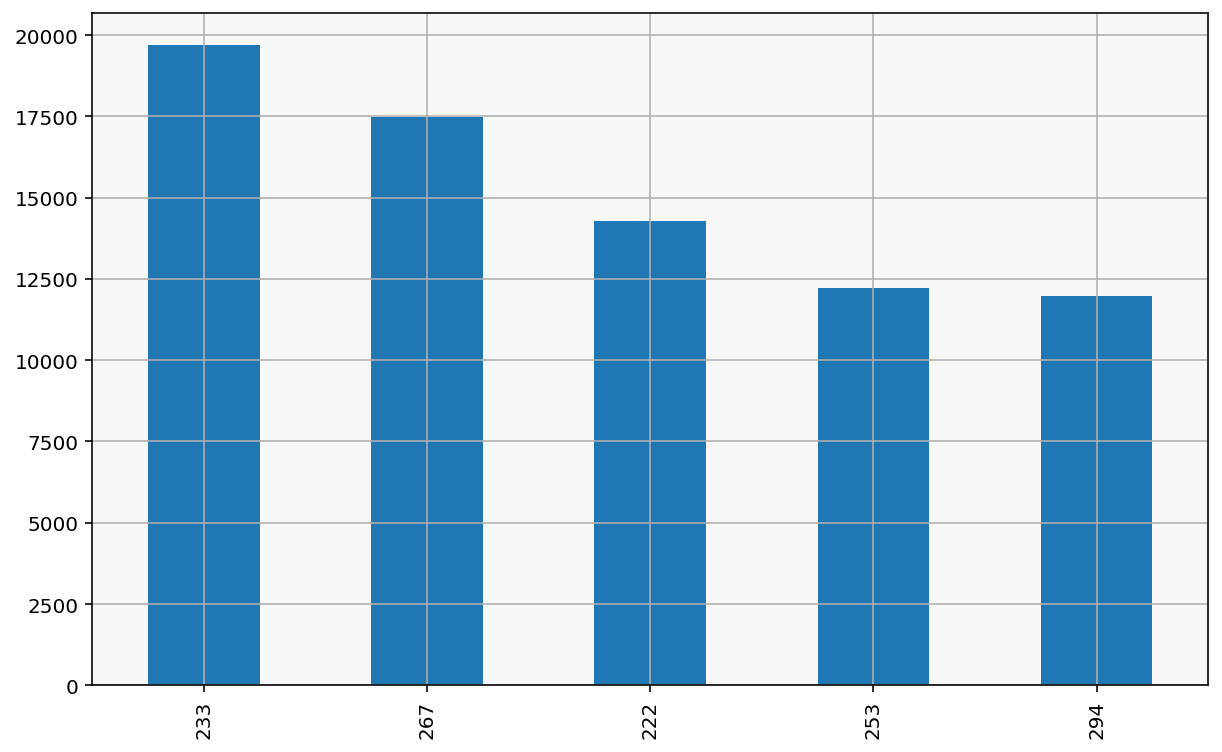

In [37]:
busy_station = merged_bike_stats2["Start station"].value_counts()[:5]
busy_station.plot.bar()

In [38]:
stations.loc[busy_station.index]

,in_service,title,number_of_locks,center.latitude,center.longitude,distance_to_oslo_center
233,True,Alexander Kiellands Plass,25,59.928050,10.751203,1.730373
267,True,Bislett Stadion,24,59.925480,10.731318,1.642612
222,True,Olaf Ryes plass,35,59.922414,10.758127,1.271247
253,True,Aker Brygge,36,59.911151,10.729977,0.915139
294,True,Torggata,30,59.915936,10.751573,0.471746


### What is the usage pattern of the busiest station?

Filter out all trips starting from the bussiest station

In [39]:
ak_plass_stats = merged_bike_stats[
    merged_bike_stats["Start station"] == busy_station.index[0]
]
ak_plass_stats.head()

,index,Start station,Start time,End station,End time,in_service,title,number_of_locks,center.latitude,center.longitude,distance_to_oslo_center
39,39,233,2016-09-01 04:11:08+00:00,211,2016-09-01 04:17:26+00:00,True,Alexander Kiellands Plass,25.0,59.92805,10.751203,1.730373
62,62,233,2016-09-01 04:17:29+00:00,247,2016-09-01 04:24:37+00:00,True,Alexander Kiellands Plass,25.0,59.92805,10.751203,1.730373
65,65,233,2016-09-01 04:17:53+00:00,271,2016-09-01 04:22:21+00:00,True,Alexander Kiellands Plass,25.0,59.92805,10.751203,1.730373
85,85,233,2016-09-01 04:22:16+00:00,272,2016-09-01 04:27:51+00:00,True,Alexander Kiellands Plass,25.0,59.92805,10.751203,1.730373
92,92,233,2016-09-01 04:24:46+00:00,295,2016-09-01 04:32:12+00:00,True,Alexander Kiellands Plass,25.0,59.92805,10.751203,1.730373


Plot the results:

In [40]:
resampled_trips = pd.DataFrame({"Counter": 1}, index=ak_plass_stats["Start time"])
resampled_trips.head()

,Counter
Start time,
2016-09-01 04:11:08+00:00,1
2016-09-01 04:17:29+00:00,1
2016-09-01 04:17:53+00:00,1
2016-09-01 04:22:16+00:00,1
2016-09-01 04:24:46+00:00,1


In [41]:
# resample every 30 minutes and sum results
resampled_trips = resampled_trips.resample("30T").sum()
resampled_trips.head()

,Counter
Start time,
2016-09-01 04:00:00+00:00,6
2016-09-01 04:30:00+00:00,9
2016-09-01 05:00:00+00:00,9
2016-09-01 05:30:00+00:00,26
2016-09-01 06:00:00+00:00,7


<AxesSubplot:xlabel='Start time'>

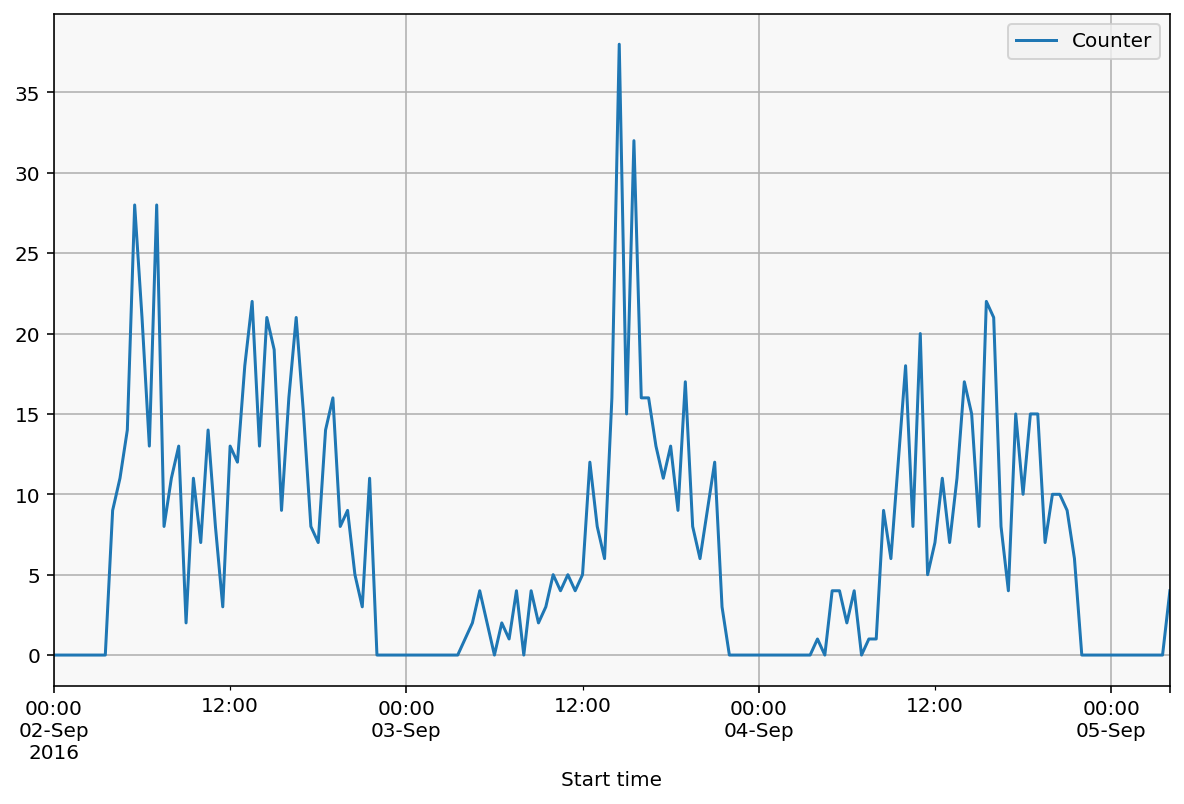

In [42]:
resampled_trips.loc["2016-09-02 00:00:00":"2016-09-05 04:00:00"].plot(y=["Counter"])

In [43]:
pd.to_datetime("2016-09-03").day_name()

'Saturday'